**Tugas Praktikum Komputasi Big Data pert_5**


**Gold Stein Maxwell Massie**

### Instruksi Praktikum untuk mahasiswa FIKTI dan FTI (kecuali Teknik Industri, Teknik Mesin dan Agroteknologi)

* Lakukan teknik data cleaning untuk data yang bernilai NaN pada Dataset 2.
* Lakukan analisis histogram kolom income pada setiap kategori race, apakah yang dapat Anda simpulkan ?
* Ganti kolom hours-per-week dengan nama hoursPerWeek
* Berapa jumlah responden yang bekerja lebih dari 40 jam per minggunya untuk masing-masing kategori race?  

In [535]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

## BAGIAN 2 : TRANSFORMASI DATA DENGAN TIPE KATEGORI**

Pada bagian ini, Anda akan mempraktikan cara untuk :
* Melakukan transformasi terhadap data yang bersifat kategori

### Dataset 2

Dataset yang akan Anda gunakan pada bagian ini adalah data sensus penduduk. Dataset ini memiliki jumlah sebanyak 48842 data dengan 15 fitur.

In [536]:
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

In [537]:
data = pd.read_csv("https://gitlab.com/andreass.bayu/file-directory/-/raw/main/adult.csv", na_values="?" )
print('Number of rows: '+ format(data.shape[0]) +', number of features: '+ format(data.shape[1]))

Number of rows: 48842, number of features: 15


In [538]:
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [539]:
## mengecek apakah terdapat nilai NA pada dataset

C = (data.dtypes == 'object')
CategoricalVariables = list(C[C].index)

Integer = (data.dtypes == 'int64')
Float   = (data.dtypes == 'float64')
NumericVariables = list(Integer[Integer].index) + list(Float[Float].index)

Missing_Percentage = (data.isnull().sum()).sum()/np.product(data.shape)*100
print("The number of missing entries before cleaning: " + str(round(Missing_Percentage,5)) + " %")

The number of missing entries before cleaning: 0.88244 %


**SOAL 1**

**Lakukan teknik data cleaning untuk data yang bernilai NaN pada Dataset 2.**

In [540]:
data.isnull().sum().sort_values(ascending=False)

occupation         2809
workclass          2799
native-country      857
age                   0
fnlwgt                0
education             0
educational-num       0
marital-status        0
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
income                0
dtype: int64

In [541]:
data = data.drop(data[data.isnull().any(1)].index, axis = 0)

<ipython-input-541-ebb77f0bfe8a>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  data = data.drop(data[data.isnull().any(1)].index, axis = 0)


In [542]:
#mengecek hasil setelah dihapus
data.shape

(45222, 15)

In [543]:
## menampilkan seluruh list fitur yang ada
list(data.columns)

['age',
 'workclass',
 'fnlwgt',
 'education',
 'educational-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [544]:
data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [545]:
data.education.unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', '5th-6th',
       'Assoc-voc', '9th', 'Doctorate', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [546]:
data['native-country'].unique()

array(['United-States', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [547]:
##melakukan proses rename kolom
dataRename = data.rename(columns={'marital-status': 'maritalStatus'})

In [548]:
dataRename.head(5)

,age,workclass,fnlwgt,education,educational-num,maritalStatus,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [549]:
dataRename.maritalStatus.unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Separated',
       'Divorced', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [550]:
## Kode untuk melakukan transformasi untuk kolom marital_status dengan fungsi maping

maritalStatus_map  = {'Never-married':0,'Married-civ-spouse':1,'Widowed':2, 'Divorced':3,'Separated':4,'Married-spouse-absent':5,'Married-AF-spouse':6}

dataRename['maritalStatus'] = dataRename['maritalStatus'].map(maritalStatus_map)
dataRename.head()

,age,workclass,fnlwgt,education,educational-num,maritalStatus,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,0,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,1,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,1,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,1,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,0,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [551]:
## Kode untuk melakukan transformasi untuk kolom marital_status dengan fungsi cat.codes
dataRename["race"] = dataRename["race"].astype('category')
dataRename["race_encoded"] = dataRename["race"].cat.codes
dataRename.head()

,age,workclass,fnlwgt,education,educational-num,maritalStatus,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,race_encoded
0,25,Private,226802,11th,7,0,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,2
1,38,Private,89814,HS-grad,9,1,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,4
2,28,Local-gov,336951,Assoc-acdm,12,1,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,4
3,44,Private,160323,Some-college,10,1,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,2
5,34,Private,198693,10th,6,0,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,4


In [552]:
## Kode untuk melakukan transformasi untuk kolom marital_status dengan fungsi Ordinal Encoder dari library sklearn
ord_enc = OrdinalEncoder()
dataRename["gender"] = ord_enc.fit_transform(dataRename[["gender"]])
dataRename[["gender", "gender"]].head(10)

,gender,gender
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
5,1.0,1.0
7,1.0,1.0
8,0.0,0.0
9,1.0,1.0
10,1.0,1.0
11,1.0,1.0


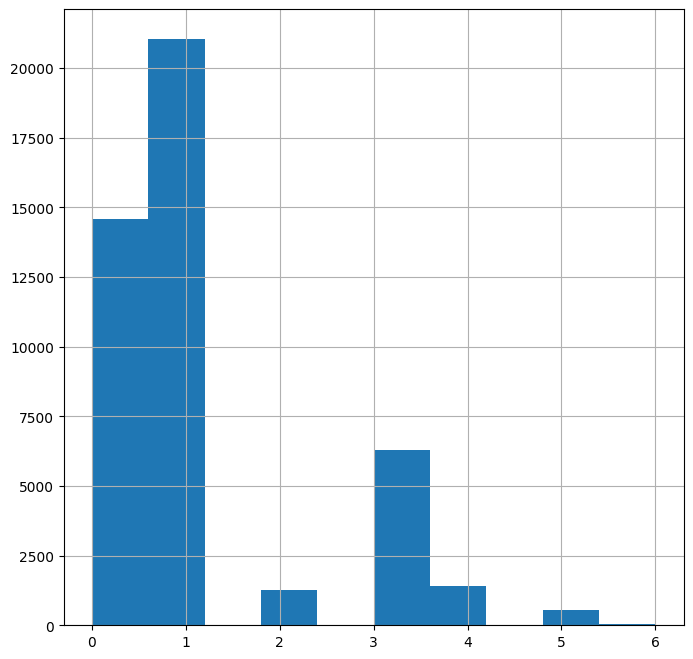

In [553]:
dataRename['maritalStatus'].hist(figsize=(8,8))
plt.show()

In [554]:
dataRename = dataRename.rename(columns={'capital-gain': 'capitalGain'})
dataRename['capitalGain'].describe()

count    45222.000000
mean      1101.430344
std       7506.430084
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capitalGain, dtype: float64

In [555]:
dataRename.head(5)

,age,workclass,fnlwgt,education,educational-num,maritalStatus,occupation,relationship,race,gender,capitalGain,capital-loss,hours-per-week,native-country,income,race_encoded
0,25,Private,226802,11th,7,0,Machine-op-inspct,Own-child,Black,1.0,0,0,40,United-States,<=50K,2
1,38,Private,89814,HS-grad,9,1,Farming-fishing,Husband,White,1.0,0,0,50,United-States,<=50K,4
2,28,Local-gov,336951,Assoc-acdm,12,1,Protective-serv,Husband,White,1.0,0,0,40,United-States,>50K,4
3,44,Private,160323,Some-college,10,1,Machine-op-inspct,Husband,Black,1.0,7688,0,40,United-States,>50K,2
5,34,Private,198693,10th,6,0,Other-service,Not-in-family,White,1.0,0,0,30,United-States,<=50K,4


In [556]:
dataRename.race.unique()

['Black', 'White', 'Other', 'Amer-Indian-Eskimo', 'Asian-Pac-Islander']
Categories (5, object): ['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White']

In [557]:
race1 = dataRename[dataRename["race_encoded"] == 1]
race2 = dataRename[dataRename["race_encoded"] == 2]
race3 = dataRename[dataRename["race_encoded"] == 3]
race4 = dataRename[dataRename["race_encoded"] == 4]
race5 = dataRename[dataRename["race_encoded"] == 5]

**SOAL 2**

**Lakukan analisis histogram kolom income pada setiap kategori race, apakah yang dapat Anda simpulkan ?**

**Analisa Histogram Race 1**

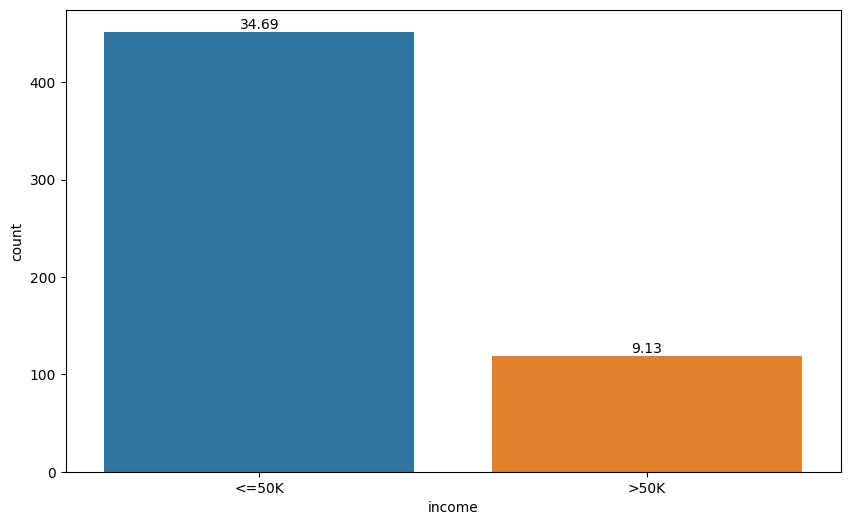

In [558]:
#ANALISIS RACE 1
plt.figure(figsize=(10,6))
total = float(len(race1) )

ax = sns.countplot(x="income", data=race4[race4["age"]>70])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center")
plt.show()

Dari hasil histogram race 1 diatas dapat disimpulkan bahwa responden yang umurnya lebih dari 70 tahun sebanyak 34.69 mempunayi income sebanyak <=50k dolar dan 9.13 >50k dolar

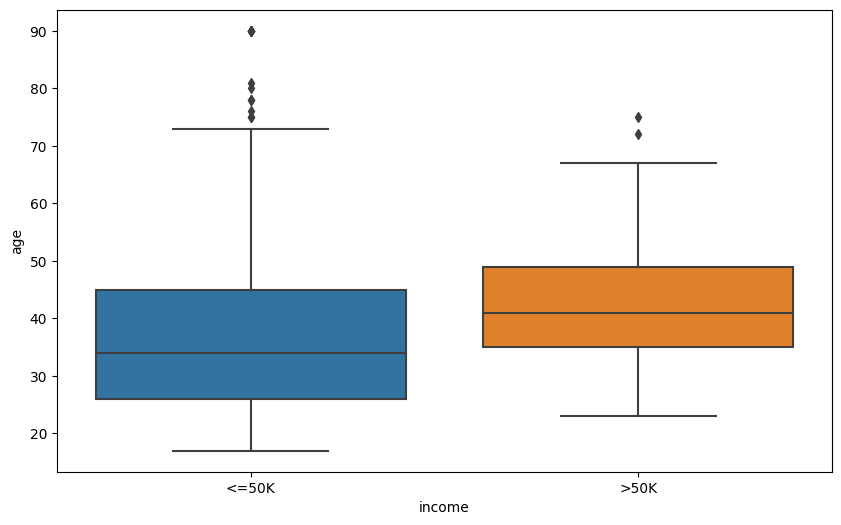

In [559]:
# BOXPLOT RACE 1
fig = plt.figure(figsize=(10,6))
sns.boxplot(x="income", y="age", data=race1)
plt.show()

dari hasil boxplot race 1 diatas dapat disimpulkan bahwa dengan penghasilan <=50k biasanya berumur sekitar 28-45 tahun dan dengan penghasilan >50k biasanya berumur sekitar 35-48 tahun

**Analisa Histogram Race 2**

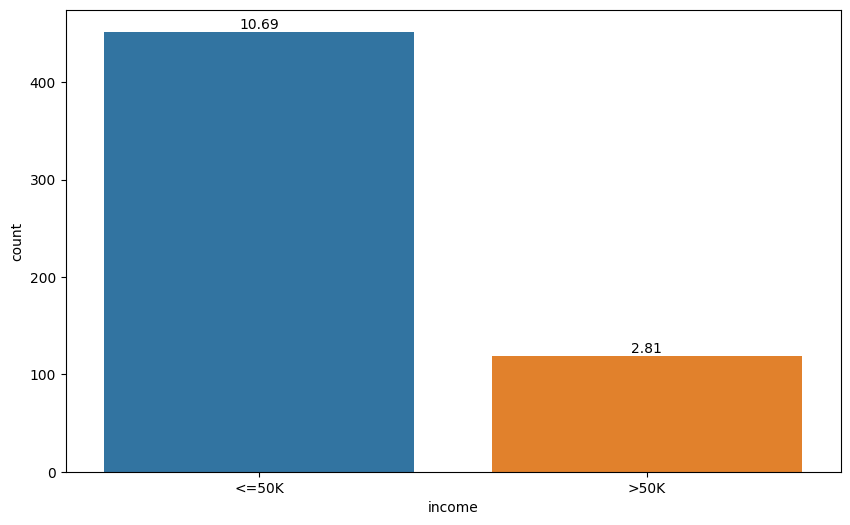

In [560]:
#ANALISIS RACE 2
plt.figure(figsize=(10,6))
total = float(len(race2) )

ax = sns.countplot(x="income", data=race4[race4["age"]>70])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center")
plt.show()

Dari hasil histogram race 2 diatas dapat disimpulkan bahwa responden yang umurnya lebih dari 70 tahun sebanyak 10.69 mempunyai income sebanyak <=50k dolar dan 2.81 sebanyak >50k dolar

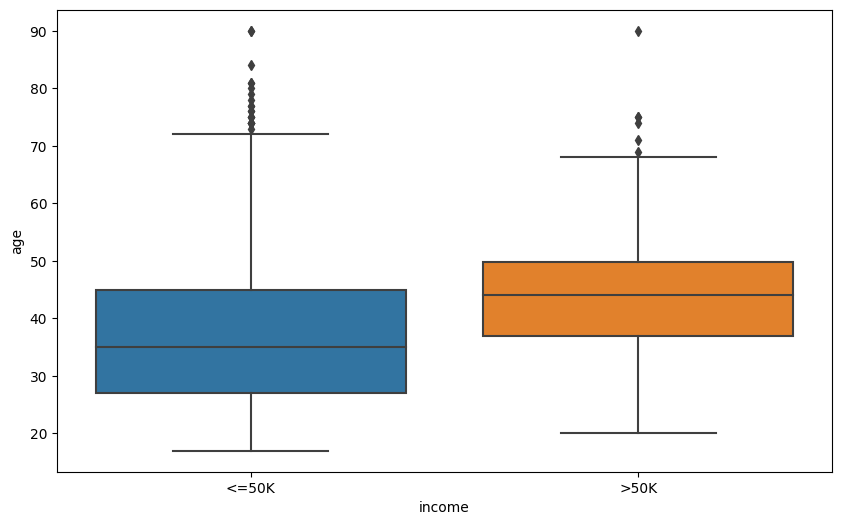

In [561]:
# BOXPLOT RACE 2
fig = plt.figure(figsize=(10,6))
sns.boxplot(x="income", y="age", data=race2)
plt.show()

dari hasil boxplot race 2 diatas dapat disimpulkan bahwa dengan penghasilan <=50k biasanya berumur sekitar 28-45 tahun dan dengan penghasilan >50k biasanya berumur sekitar 35-50 tahun

**Analisa Histogram Race 3**

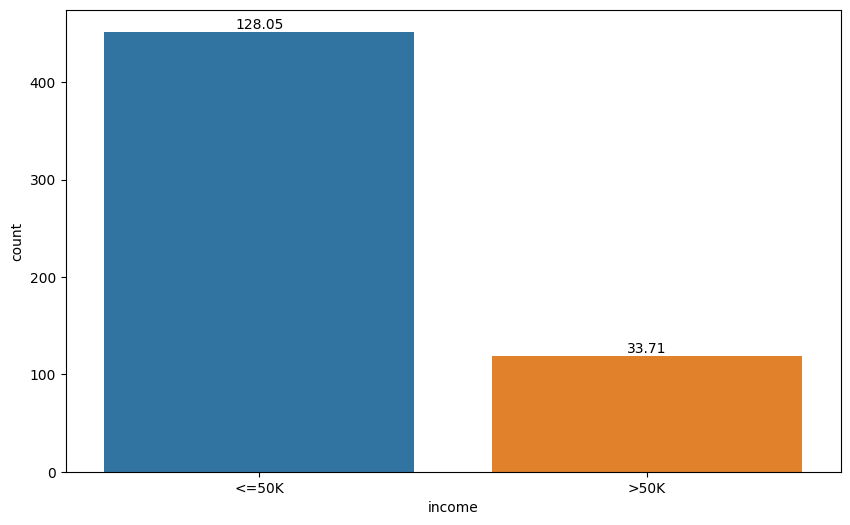

In [562]:
#ANALISIS RACE 3
plt.figure(figsize=(10,6))
total = float(len(race3) )

ax = sns.countplot(x="income", data=race4[race4["age"]>70])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center")
plt.show()

Dari hasil histogram race 3 diatas dapat disimpulkan bahwa bahwa responden yang umurnya lebih dari 70 tahun sebanyak 128.05 mempunyai income sebanyak <=50k dolar dan 33.71 sebanyak >50k dolar

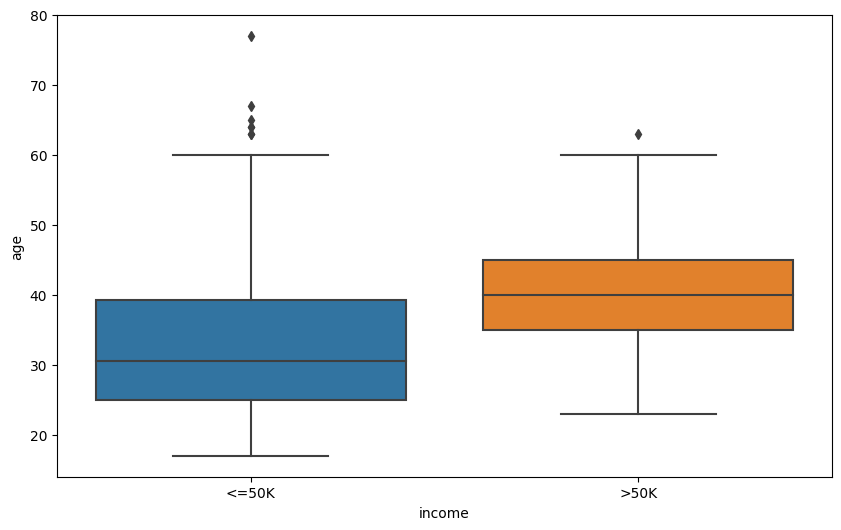

In [563]:
# BOXPLOT RACE 3
fig = plt.figure(figsize=(10,6))
sns.boxplot(x="income", y="age", data=race3)
plt.show()

dari hasil boxplot race 3 diatas dapat disimpulkan bahwa dengan penghasilan <=50k biasanya berumur sekitar 25-40 tahun dan dengan penghasilan >50k biasanya berumur sekitar 38-45 tahun

**Analisa Histogram Race 4**

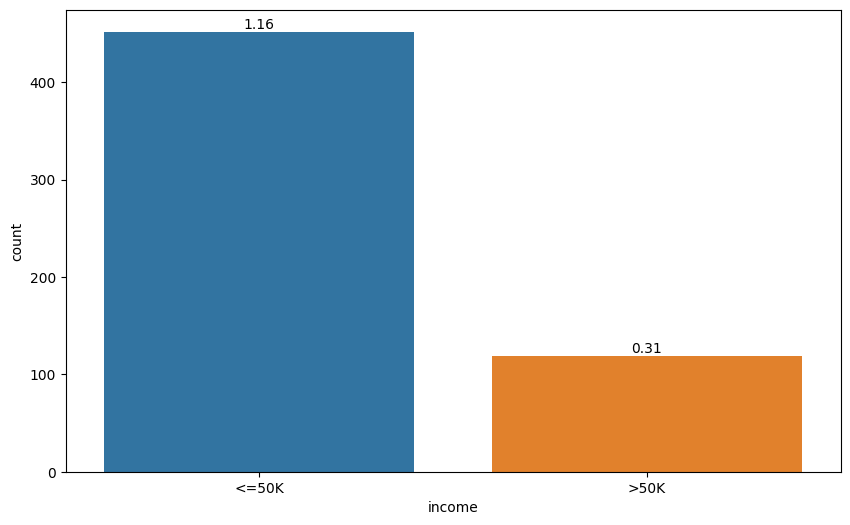

In [564]:
#ANALISIS RACE 4
plt.figure(figsize=(10,6))
total = float(len(race4) )

ax = sns.countplot(x="income", data=race4[race4["age"]>70])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center")
plt.show()

Dari hasil histogram race 4 diatas dapat disimpulkan bahwa bahwa responden yang umurnya lebih dari 70 tahun sebanyak 1.16 mempunyai income sebanyak <=50k dolar dan 0.31 sebanyak >50k dolar

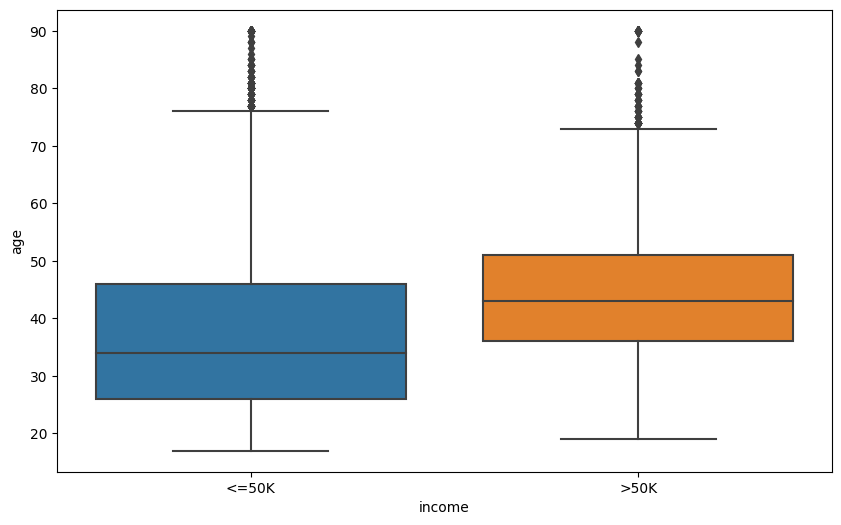

In [565]:
# BOXPLOT RACE 4
fig = plt.figure(figsize=(10,6))
sns.boxplot(x="income", y="age", data=race4)
plt.show()

dari hasil boxplot race 4 diatas dapat disimpulkan bahwa dengan penghasilan <=50k biasanya berumur sekitar 28-48 tahun dan dengan penghasilan >50k biasanya berumur sekitar 35-50 tahun

**Analisa Histogram Race 5**

<ipython-input-566-247c63ae9852>:10: RuntimeWarning: divide by zero encountered in double_scalars
  '{:1.2f}'.format((height/total)*100),


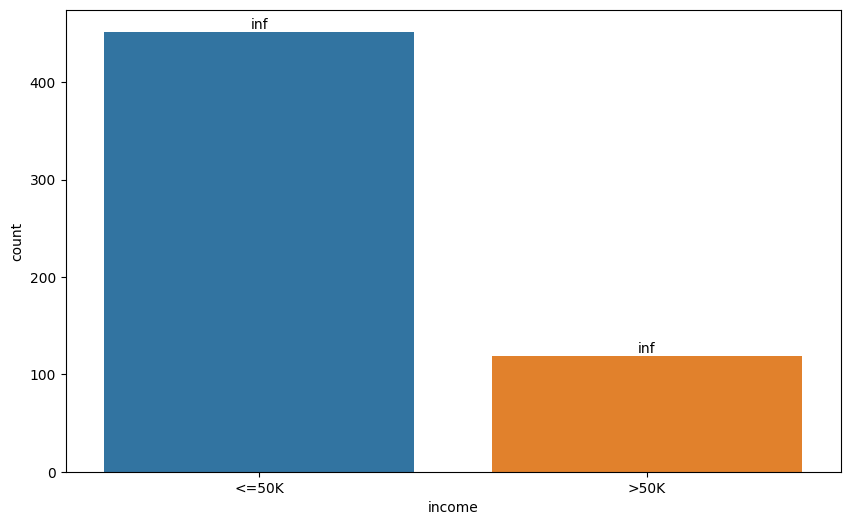

In [566]:
#ANALISIS RACE 5
plt.figure(figsize=(10,6))
total = float(len(race5) )

ax = sns.countplot(x="income", data=race4[race4["age"]>70])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center")
plt.show()

Dari hasil histogram race 5 diatas dapat disimpulkan bahwa tidak menghasilan kesimpulan karena nilainya inf

**SOAL 3**

**Berapa jumlah responden yang bekerja lebih dari 40 jam per minggunya untuk masing-masing kategori race?**

In [567]:
# Daftar kategori ras (race_encoded)
race_categories = [1, 2, 3, 4, 5]

# Inisialisasi dictionary untuk menyimpan hasil
results = {}

# Loop untuk menghitung jumlah responden yang bekerja lebih dari 40 jam per minggu untuk setiap kategori ras
for race_category in race_categories:
    filtered_data = dataRename[dataRename["race_encoded"] == race_category]
    count = (filtered_data['hours-per-week'] > 40).sum()
    results[f"Race {race_category}"] = count

# Menampilkan hasil
for race, count in results.items():
    print(f"Jumlah responden dari {race} yang bekerja lebih dari 40 jam per minggu: {count}")


Jumlah responden dari Race 1 yang bekerja lebih dari 40 jam per minggu: 303
Jumlah responden dari Race 2 yang bekerja lebih dari 40 jam per minggu: 654
Jumlah responden dari Race 3 yang bekerja lebih dari 40 jam per minggu: 65
Jumlah responden dari Race 4 yang bekerja lebih dari 40 jam per minggu: 12654
Jumlah responden dari Race 5 yang bekerja lebih dari 40 jam per minggu: 0


**SOAL 4**

**Ganti kolom hours-per-week dengan nama hoursPerWeek**

In [568]:
dataRename = data.rename(columns={'hours-per-week': 'hoursPerWeek'})

In [569]:
#hasil setelah diganti nama kolom hours-per-week menjadi hoursPerWeek
dataRename.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hoursPerWeek,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
